In [1]:
import csv
from datetime import datetime

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score

from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('Merged sensors+interpolated+Presence+Gradient+each room presence.csv', header=0, index_col='Datetime', parse_dates=['Datetime'])
data = data.dropna()

In [3]:
# Separate features and target variable
X = data.drop(columns=['Presence','Room 104','Room 203','Room 204'])
y_reg = data['Presence']
y = data['Presence']
y_reg_validation = data.Presence

In [4]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
Xcnn = X.reshape((X.shape[0], X.shape[1], 1))

In [5]:
# Prepare the category from the classification methods
y = to_categorical(y, num_classes=int(y.max()+1))

In [6]:
# Fro printing the results
y_validation_cat = np.argmax(y, axis=1)

# Testing the models from the 4 month data

In [7]:
Newmodel4month = tf.keras.models.load_model('Newmodel_Half_randomnewDATA.keras')

In [8]:
loaded_loss, loaded_accuracy = Newmodel4month.evaluate(X, y)
print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')
y_pred_Newmodel = Newmodel4month.predict(X)
y_pred_Newmodel_cat = np.argmax(y_pred_Newmodel, axis=1)

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7604 - loss: 0.7532
Loaded model validation accuracy: 0.7602
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


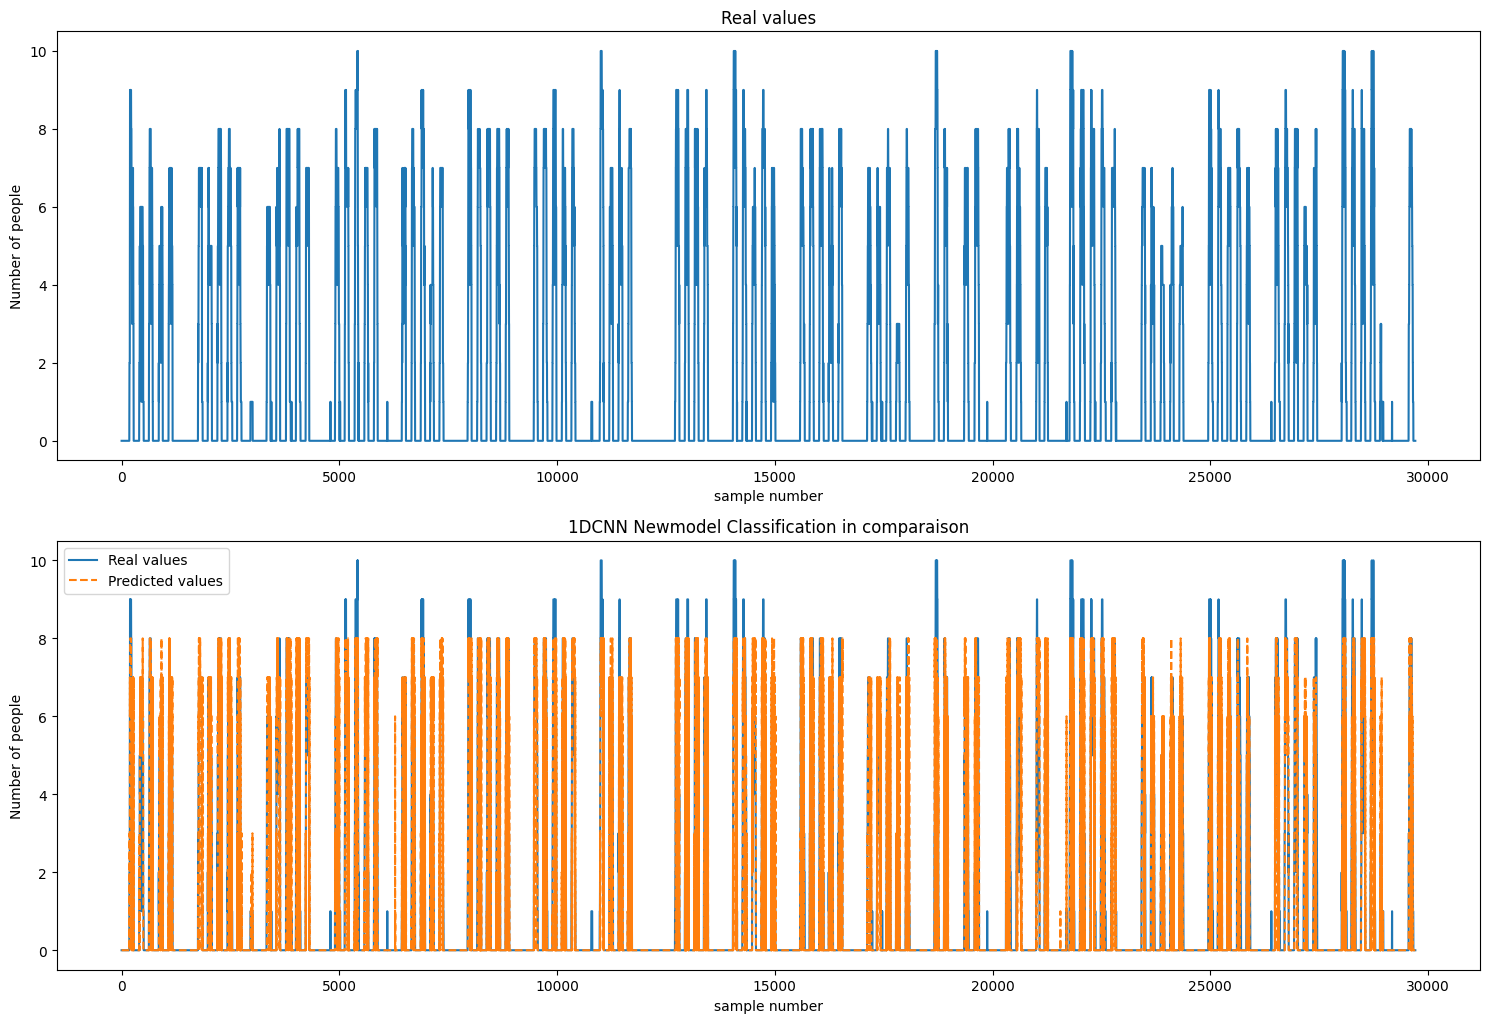

In [9]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_Newmodel_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Newmodel Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
ztrue_yes = [1 if y > 0 else 0 for y in y_validation_cat]
zpredicted_cla = [1 if y > 0 else 0 for y in y_pred_Newmodel_cat]

In [11]:
accuracy = accuracy_score(ztrue_yes, zpredicted_cla)
f1 = f1_score(ztrue_yes, zpredicted_cla, average='macro')

print('Newmodel metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Newmodel metrics:
Accuracy: 0.9192810017503703
F1 Score: 0.8963134849320943


In [12]:
accuracy = accuracy_score(y_validation_cat, y_pred_Newmodel_cat)
f1 = f1_score(y_validation_cat, y_pred_Newmodel_cat, average='macro')

print('Newmodel metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Newmodel metrics:
Accuracy: 0.7601656119563754
F1 Score: 0.23011708578655785
